In [1]:

documents = [
    "This is a list which containing sample documents.",
    "Keywords are important for keyword-based search.",
    "Document analysis involves extracting keywords.",
    "Keyword-based search relies on sparse embeddings.",
    "Understanding document structure aids in keyword extraction.",
    "Efficient keyword extraction enhances search accuracy.",
    "Semantic similarity improves document retrieval performance.",
    "Machine learning algorithms can optimize keyword extraction methods."
]

In [2]:
from sentence_transformers import SentenceTransformer

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load pre-trained Sentence Transformer model
model_name = 'sentence-transformers/paraphrase-xlm-r-multilingual-v1' # 768 dimension

In [4]:
model = SentenceTransformer(model_name)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--sentence-transformers--paraphrase-xlm-r-multilingual-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [5]:
document_embeddings = model.encode(documents)

In [6]:

len(document_embeddings)

8

In [7]:
len(document_embeddings[0])

768

In [8]:
for i, embedding in enumerate(document_embeddings):
    print(f"Document {i+1} embedding: {embedding}")

Document 1 embedding: [ 0.10894685  0.0781207   0.11626569 -0.31912503  0.4689022   0.43514383
  0.01453738  0.44238767  0.297164   -0.18982707  0.07389054 -0.27864906
  0.21338163 -0.1207701   0.17891699 -0.00789878  0.04754862 -0.18204565
  0.3422711  -0.06994258 -0.14288741  0.5714125  -0.11153244 -0.17895408
  0.01523129  0.2610571  -0.20555831  0.05203114 -0.02810769  0.2387324
  0.0120698   0.04404927  0.02242311 -0.13895182 -0.7410038   0.25601006
  0.08149689  0.18820496 -0.4123769   0.11368618  0.28121173  0.05860886
 -0.1731878   0.33549133  0.21803683 -0.05090715 -0.05457789 -0.8738479
 -0.24082275  0.32006976  0.44761655  0.06347825  0.5357486   0.16607258
 -0.33197     0.33393636  0.2861592  -0.5419566  -0.2713242   0.24881154
 -0.23919384 -0.4692628   0.13836576  0.3784289  -0.01304429  0.019906
  0.32365087  0.45857537  0.07600261  0.25299588 -0.42938945  0.10051926
 -0.33042598 -0.6987648   0.01035903  0.05666573  0.14731245 -0.47082353
  0.08063988  0.33870456 -0.27278

In [9]:
query = "Natural language processing techniques enhance keyword extraction efficiency."


In [12]:

query_embedding = model.encode(query)

In [13]:

print("Query embedding:", query_embedding)

Query embedding: [ 3.42821062e-01  3.26170474e-01  7.73253338e-03  1.60758775e-02
  2.38517039e-02 -2.52880841e-01  8.15468729e-02  1.37177363e-01
  3.33291799e-01  3.65743861e-02 -9.28223506e-02 -3.43725681e-01
  7.12015927e-02  9.48833823e-01 -9.41290110e-02 -7.96413839e-01
 -3.20592105e-01 -2.67564505e-01  2.08664209e-01  7.99598843e-02
  7.93330837e-03 -5.22297807e-02 -1.00512728e-01 -2.04229757e-01
  2.19562620e-01  7.67739266e-02  1.25881523e-01  2.90843785e-01
 -4.99191105e-01  2.27709621e-01 -1.94742575e-01  7.21394643e-02
 -4.56513371e-03  1.21945575e-01 -1.46225691e-01 -9.64745134e-02
  1.02258235e-01 -2.04421118e-01 -3.95657718e-01  7.32251257e-02
  1.10104166e-01  4.84611154e-01  1.04519255e-01  3.86131734e-01
 -1.68697253e-01 -2.11251125e-01 -6.38036430e-01 -4.32641476e-01
  2.74459153e-01  9.64053422e-02 -1.30053520e-01  5.76568581e-02
  8.07963088e-02  6.48147315e-02 -2.14186427e-03  2.29773819e-01
 -6.66054413e-02  3.07675302e-01  2.11779609e-01 -1.57844469e-01
  9.7886

In [14]:

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [15]:

similarities = cosine_similarity(np.array([query_embedding]), document_embeddings)

In [16]:
similarities

array([[0.16948146, 0.4580227 , 0.56756943, 0.44123292, 0.6316117 ,
        0.75214124, 0.550352  , 0.74481654]], dtype=float32)

In [17]:
most_similar_index = np.argmax(similarities)

In [18]:
most_similar_index

np.int64(5)

In [19]:
most_similar_document = documents[most_similar_index]

In [20]:
most_similar_document

'Efficient keyword extraction enhances search accuracy.'

In [21]:
query

'Natural language processing techniques enhance keyword extraction efficiency.'

In [22]:
similarity_score = similarities[0][most_similar_index]

In [23]:
similarity_score

np.float32(0.75214124)

In [24]:

sorted_indices = np.argsort(similarities[0])[::-1]

In [25]:
sorted_indices

array([5, 7, 4, 2, 6, 1, 3, 0])

In [26]:
ranked_documents = [(documents[i], similarities[0][i]) for i in sorted_indices]

In [27]:

ranked_documents

[('Efficient keyword extraction enhances search accuracy.',
  np.float32(0.75214124)),
 ('Machine learning algorithms can optimize keyword extraction methods.',
  np.float32(0.74481654)),
 ('Understanding document structure aids in keyword extraction.',
  np.float32(0.6316117)),
 ('Document analysis involves extracting keywords.', np.float32(0.56756943)),
 ('Semantic similarity improves document retrieval performance.',
  np.float32(0.550352)),
 ('Keywords are important for keyword-based search.', np.float32(0.4580227)),
 ('Keyword-based search relies on sparse embeddings.', np.float32(0.44123292)),
 ('This is a list which containing sample documents.', np.float32(0.16948146))]

In [28]:
query

'Natural language processing techniques enhance keyword extraction efficiency.'

In [29]:
print("Ranked Documents:")
for rank, (document, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {rank}: Document - '{document}', Similarity Score - {similarity}")

Ranked Documents:
Rank 1: Document - 'Efficient keyword extraction enhances search accuracy.', Similarity Score - 0.7521412372589111
Rank 2: Document - 'Machine learning algorithms can optimize keyword extraction methods.', Similarity Score - 0.7448165416717529
Rank 3: Document - 'Understanding document structure aids in keyword extraction.', Similarity Score - 0.631611704826355
Rank 4: Document - 'Document analysis involves extracting keywords.', Similarity Score - 0.5675694346427917
Rank 5: Document - 'Semantic similarity improves document retrieval performance.', Similarity Score - 0.5503519773483276
Rank 6: Document - 'Keywords are important for keyword-based search.', Similarity Score - 0.45802271366119385
Rank 7: Document - 'Keyword-based search relies on sparse embeddings.', Similarity Score - 0.44123291969299316
Rank 8: Document - 'This is a list which containing sample documents.', Similarity Score - 0.16948145627975464


In [30]:

print("Top 4 Documents:")
for rank, (document, similarity) in enumerate(ranked_documents[:4], start=1):
    print(f"Rank {rank}: Document - '{document}', Similarity Score - {similarity}")

Top 4 Documents:
Rank 1: Document - 'Efficient keyword extraction enhances search accuracy.', Similarity Score - 0.7521412372589111
Rank 2: Document - 'Machine learning algorithms can optimize keyword extraction methods.', Similarity Score - 0.7448165416717529
Rank 3: Document - 'Understanding document structure aids in keyword extraction.', Similarity Score - 0.631611704826355
Rank 4: Document - 'Document analysis involves extracting keywords.', Similarity Score - 0.5675694346427917


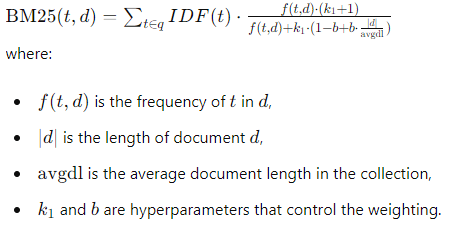

using bm25okapi

In [31]:
from rank_bm25 import BM25Okapi

In [32]:

top_4_documents = [doc[0] for doc in ranked_documents[:4]]

In [33]:
top_4_documents

['Efficient keyword extraction enhances search accuracy.',
 'Machine learning algorithms can optimize keyword extraction methods.',
 'Understanding document structure aids in keyword extraction.',
 'Document analysis involves extracting keywords.']

In [34]:
tokenized_top_4_documents = [doc.split() for doc in top_4_documents]

In [35]:
tokenized_top_4_documents

[['Efficient', 'keyword', 'extraction', 'enhances', 'search', 'accuracy.'],
 ['Machine',
  'learning',
  'algorithms',
  'can',
  'optimize',
  'keyword',
  'extraction',
  'methods.'],
 ['Understanding',
  'document',
  'structure',
  'aids',
  'in',
  'keyword',
  'extraction.'],
 ['Document', 'analysis', 'involves', 'extracting', 'keywords.']]

In [36]:
tokenized_query = query.split()

In [37]:
tokenized_query

['Natural',
 'language',
 'processing',
 'techniques',
 'enhance',
 'keyword',
 'extraction',
 'efficiency.']

In [38]:

bm25=BM25Okapi(tokenized_top_4_documents)

In [39]:
bm25

In [40]:
bm25_scores = bm25.get_scores(tokenized_query)

In [41]:
bm25_scores

array([0.1907998 , 0.16686672, 0.17803252, 0.        ])

In [42]:
sorted_indices2 = np.argsort(bm25_scores)[::-1] # desending

In [43]:
sorted_indices2

array([0, 2, 1, 3])

In [44]:
top_4_documents

['Efficient keyword extraction enhances search accuracy.',
 'Machine learning algorithms can optimize keyword extraction methods.',
 'Understanding document structure aids in keyword extraction.',
 'Document analysis involves extracting keywords.']

In [45]:
query

'Natural language processing techniques enhance keyword extraction efficiency.'

In [46]:
reranked_documents = [(top_4_documents[i], bm25_scores[i]) for i in sorted_indices2]

In [47]:
reranked_documents

[('Efficient keyword extraction enhances search accuracy.',
  np.float64(0.19079979534096053)),
 ('Understanding document structure aids in keyword extraction.',
  np.float64(0.1780325227902643)),
 ('Machine learning algorithms can optimize keyword extraction methods.',
  np.float64(0.1668667199671815)),
 ('Document analysis involves extracting keywords.', np.float64(0.0))]

In [48]:

print("Rerank of top 4 Documents:")
for rank, (document, similarity) in enumerate(reranked_documents, start=1):
    print(f"Rank {rank}: Document - '{document}', Similarity Score - {similarity}")

Rerank of top 4 Documents:
Rank 1: Document - 'Efficient keyword extraction enhances search accuracy.', Similarity Score - 0.19079979534096053
Rank 2: Document - 'Understanding document structure aids in keyword extraction.', Similarity Score - 0.1780325227902643
Rank 3: Document - 'Machine learning algorithms can optimize keyword extraction methods.', Similarity Score - 0.1668667199671815
Rank 4: Document - 'Document analysis involves extracting keywords.', Similarity Score - 0.0


In [49]:
ranked_documents[:4]

[('Efficient keyword extraction enhances search accuracy.',
  np.float32(0.75214124)),
 ('Machine learning algorithms can optimize keyword extraction methods.',
  np.float32(0.74481654)),
 ('Understanding document structure aids in keyword extraction.',
  np.float32(0.6316117)),
 ('Document analysis involves extracting keywords.', np.float32(0.56756943))]

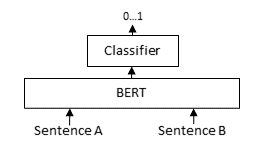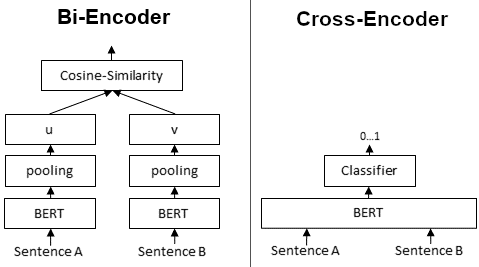

using cross encoder

In [50]:
from sentence_transformers import CrossEncoder

In [51]:
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--cross-encoder--ms-marco-MiniLM-L-6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [52]:
pairs = []
for doc in top_4_documents:
    pairs.append([query, doc])

In [53]:
pairs

[['Natural language processing techniques enhance keyword extraction efficiency.',
  'Efficient keyword extraction enhances search accuracy.'],
 ['Natural language processing techniques enhance keyword extraction efficiency.',
  'Machine learning algorithms can optimize keyword extraction methods.'],
 ['Natural language processing techniques enhance keyword extraction efficiency.',
  'Understanding document structure aids in keyword extraction.'],
 ['Natural language processing techniques enhance keyword extraction efficiency.',
  'Document analysis involves extracting keywords.']]

In [54]:
scores = cross_encoder.predict(pairs)
scores

array([ 3.1378732,  0.8421646, -2.9193015, -2.8781915], dtype=float32)

In [55]:

scored_docs = zip(scores, top_4_documents)

In [56]:
scored_docs

In [57]:
reranked_document_cross_encoder = sorted(scored_docs, reverse=True)

In [58]:
reranked_document_cross_encoder

[(np.float32(3.1378732),
  'Efficient keyword extraction enhances search accuracy.'),
 (np.float32(0.8421646),
  'Machine learning algorithms can optimize keyword extraction methods.'),
 (np.float32(-2.8781915), 'Document analysis involves extracting keywords.'),
 (np.float32(-2.9193015),
  'Understanding document structure aids in keyword extraction.')]

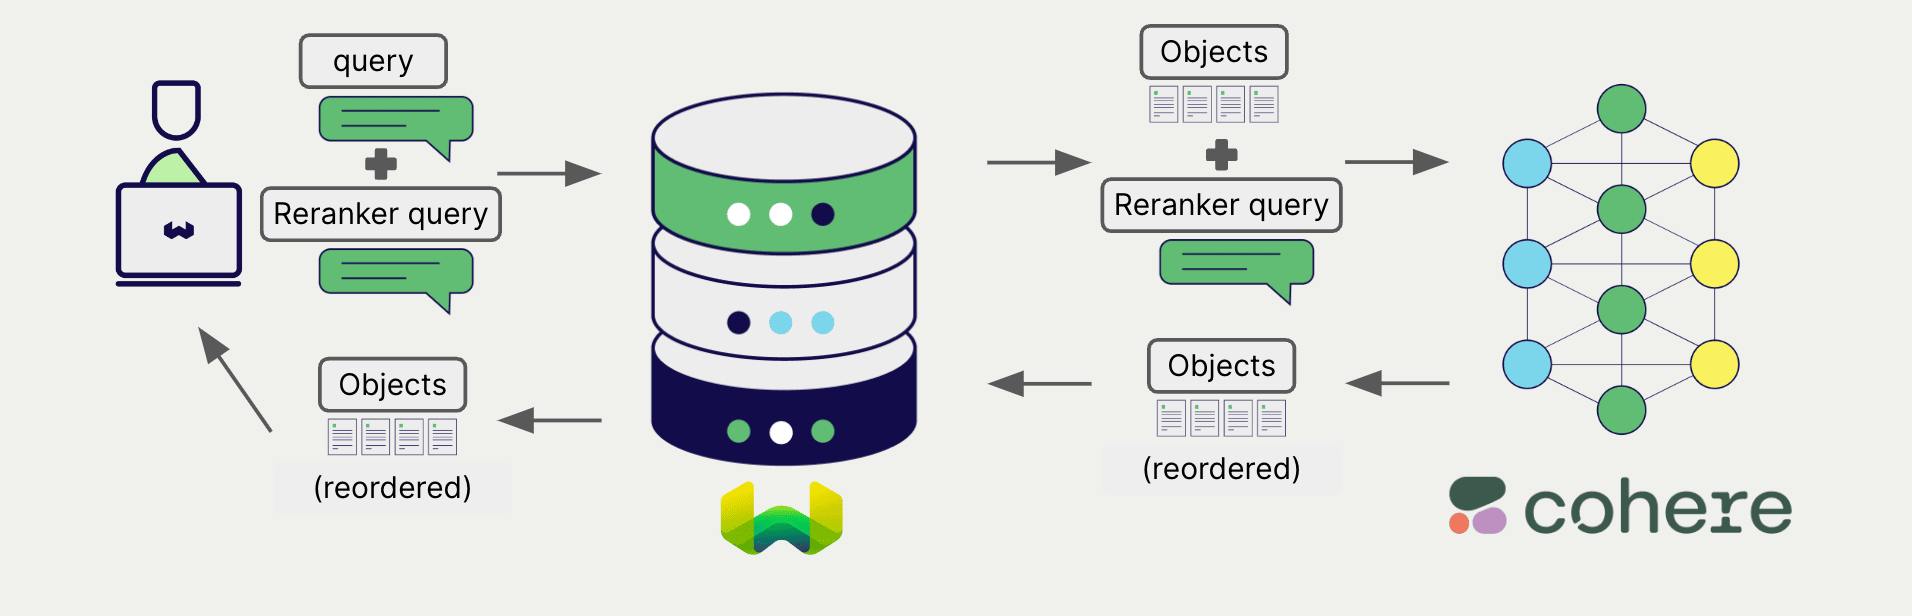

using cohere

In [59]:

import cohere

In [71]:
import os
from dotenv import  load_dotenv
load_dotenv()
COHERE_API_KEY = os.getenv("COHERE_API_KEY")

In [60]:
co = cohere.Client(COHERE_API_KEY)

In [61]:
top_4_documents

['Efficient keyword extraction enhances search accuracy.',
 'Machine learning algorithms can optimize keyword extraction methods.',
 'Understanding document structure aids in keyword extraction.',
 'Document analysis involves extracting keywords.']

In [62]:
response = co.rerank(
    model="rerank-english-v3.0",
    query="Natural language processing techniques enhance keyword extraction efficiency.",
    documents=top_4_documents,
    return_documents=True
)

In [63]:
print(response)

id='39d7708e-4d31-491e-90f4-657b2b62e52a' results=[RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Efficient keyword extraction enhances search accuracy.'), index=0, relevance_score=0.99411184), RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Machine learning algorithms can optimize keyword extraction methods.'), index=1, relevance_score=0.9129032), RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Understanding document structure aids in keyword extraction.'), index=2, relevance_score=0.32885265), RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Document analysis involves extracting keywords.'), index=3, relevance_score=0.02865267)] meta=ApiMeta(api_version=ApiMetaApiVersion(version='1', is_deprecated=None, is_experimental=None), billed_units=ApiMetaBilledUnits(images=None, input_tokens=None, output_tokens=None, search_units=1.0, classifications=None), tokens=None, warnings=None)


In [64]:

response.results[0].document.text

'Efficient keyword extraction enhances search accuracy.'

In [66]:
for i in range(4):
  print(f'text: {response.results[i].document.text} score: {response.results[i].relevance_score}')

text: Efficient keyword extraction enhances search accuracy. score: 0.99411184
text: Machine learning algorithms can optimize keyword extraction methods. score: 0.9129032
text: Understanding document structure aids in keyword extraction. score: 0.32885265
text: Document analysis involves extracting keywords. score: 0.02865267
